In [202]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets as dsets 
from torchvision import transforms

import numpy as np
from sklearn.datasets import make_multilabel_classification as make_data
import matplotlib.pyplot as plt
from statistics import mean

In [203]:
train = dsets.MNIST(root = './pytorch/softmax', train = True, download = True, transform = transforms.ToTensor())
val = dsets.MNIST(root = './pytorch/softmax', train = False, download = True, transform = transforms.ToTensor())

train_loader = DataLoader(dataset=train, batch_size=100, shuffle=True)
val_loader = DataLoader(dataset=val, batch_size=10000, shuffle=True)

In [204]:
class Softmax(nn.Module):

    def __init__(self, insize, outsize):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(insize, outsize)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [205]:
def show_img(dataset):
    data = dataset[np.random.randint(0,len(dataset))]
    label = data[1]
    image = data[0][0]
    plt.figure(figsize = (7,5))
    plt.title('Label : ' + str(label))
    plt.imshow(image)
    plt.show()

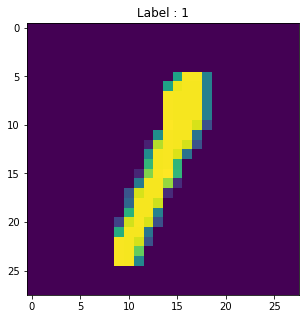

In [206]:
show_img(train)

In [207]:
input_size = train[0][0][0].shape[0] * train[0][0][0].shape[1]
output_size = 10

In [208]:
model = Softmax(input_size, output_size)
print('Weights : ', model.state_dict()['linear.weight'].shape)
print('Biases : ', model.state_dict()['linear.bias'].shape)

Weights :  torch.Size([10, 784])
Biases :  torch.Size([10])


In [209]:
def Plotparameters(model, title):
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (15,7))
    fig.suptitle(title, size = 20)
    ax = ax.reshape(ax.shape[0] * ax.shape[1])
    params = model.state_dict()['linear.weight']
    
    counter = 0
    for i in params:
        to_plot = i.view(28,28)
        ax[counter].imshow(to_plot)
        counter += 1

    plt.show()

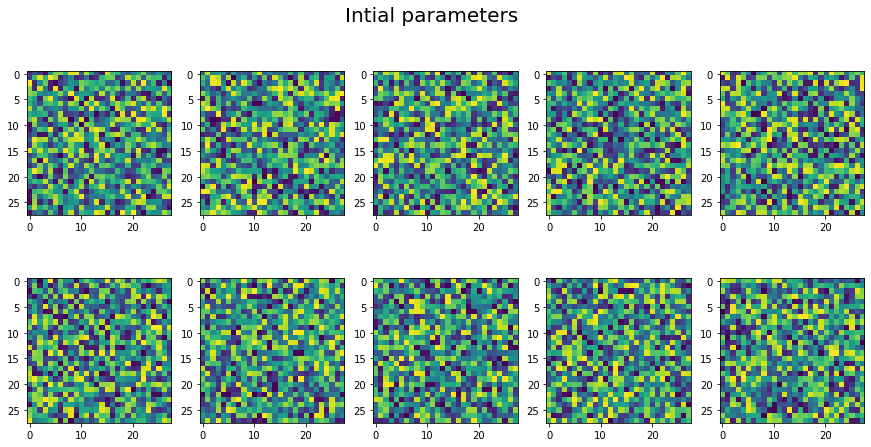

In [210]:
Plotparameters(model, 'Intial parameters')

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  2.165615609884262
Accuracy on test set : 55.16 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.906538195014
Accuracy on test set : 70.8 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.7015998913844426
Accuracy on test set : 75.46000000000001 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.5379685962200165
Accuracy on test set : 77.73 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.4065592207511266
Accuracy on test set : 79.17999999999999 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.3

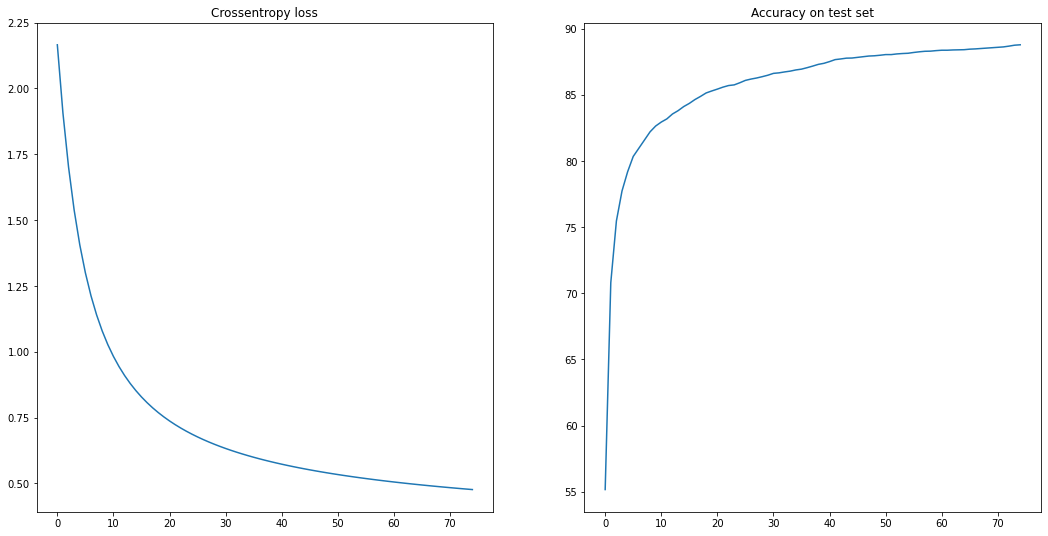

In [211]:
learning_rate = 0.0005
epochs = 200
opt = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
to_plot = []
accuracy = []

try : 
    for epoch in range(epochs):

        print('EPOCH : ', epoch + 1)
        print('Batch : ', end = '')
        counter = 0
        mean_loss_list = []
        for x,y in train_loader :

            opt.zero_grad()
            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            loss = criterion(yhat,y)
            mean_loss_list.append(loss.item())

            loss.backward()
            opt.step()

            if counter % 100 == 0 : 
                print(str(counter) + ' --> ', end = '', flush = True)
            counter += 1

        mean_loss = mean(mean_loss_list)
        to_plot.append(mean_loss)

        correct = 0
        incorrect = 0

        for x,y in val_loader :

            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            for i in range(yhat.shape[0]):
                pred = yhat[i].argmax().item()
                actual = y[i].item()

                if pred == actual :
                    correct += 1
                else :
                    incorrect += 1
        
        acc = (correct / (correct + incorrect)) * 100
        accuracy.append(acc)

        print()
        print('Mean loss : ', mean_loss)
        print(f'Accuracy on test set : {acc} %')
        print('-' * 50)

except KeyboardInterrupt : 
    fig2, ax2 = plt.subplots(nrows = 1, ncols = 2, figsize = (18,9))

    ax2[0].set_title('Crossentropy loss')
    ax2[0].plot(to_plot)

    ax2[1].set_title('Accuracy on test set')
    ax2[1].plot(accuracy)

    plt.show()

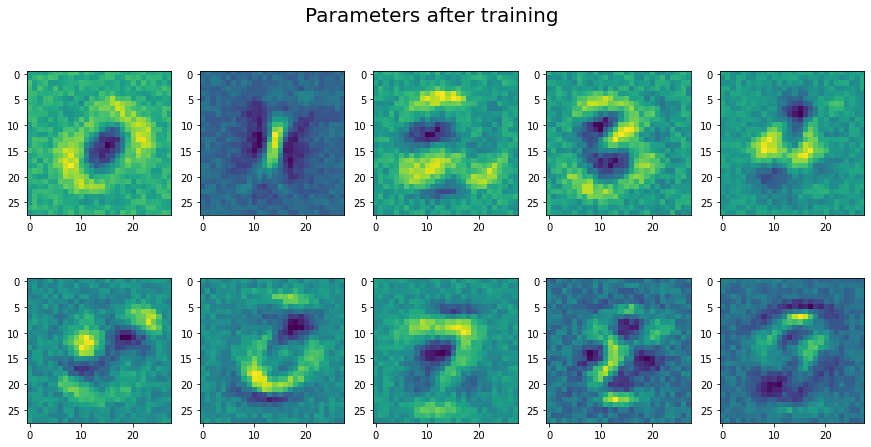

In [212]:
Plotparameters(model, 'Parameters after training')

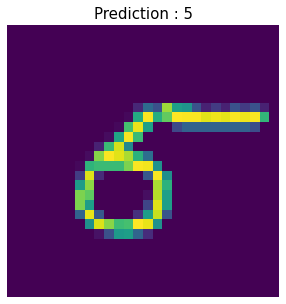

In [239]:
img_number = np.random.randint(0, len(val))
test_img = val[img_number][0][0]
prediction = model.forward(test_img.view(test_img.shape[0] * test_img.shape[1])).argmax()

plt.figure(figsize = (7,5))
plt.title('Prediction : ' + str(prediction.item()), size = 15)
plt.imshow(test_img)
plt.axis(False)
plt.show()

In [214]:
torch.save(model, 'MNIST_model.pt')